In [40]:
from fktools import *
import tensorflow as tf
import sklearn


In [41]:
tf.device(tf.config.list_logical_devices('GPU')[0].name)

In [42]:
# X = np.load("dataset_X.npz")['arr_0']
# y = np.load("dataset_y.npz")['arr_0']

# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")


X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [ ]:
layers = [
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax'),
]

test_model = tf.keras.Sequential(layers)

test_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='kld',
    metrics=['acc']
)
# test_model.summary()


history = test_model.fit(
    X, y,
    epochs=100,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.1241 - loss: 1.0039 - val_acc: 0.1238 - val_loss: 0.9940
Epoch 2/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - acc: 0.1795 - loss: 0.9874 - val_acc: 0.2451 - val_loss: 0.9759
Epoch 3/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - acc: 0.2629 - loss: 0.9681 - val_acc: 0.2830 - val_loss: 0.9549
Epoch 4/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - acc: 0.3065 - loss: 0.9451 - val_acc: 0.3352 - val_loss: 0.9299
Epoch 5/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - acc: 0.3424 - loss: 0.9183 - val_acc: 0.3475 - val_loss: 0.9005
Epoch 6/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - acc: 0.3439 - loss: 0.8863 - val_acc: 0.3459 - val_loss: 0.8651
Epoch 7/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - acc: 0.3429 - loss: 0.8476 - val_acc: 0.3451 - val_loss: 0.8230
Epoch 8/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - acc: 0.3420 - loss: 0.8041 - val_acc: 0.3405 - val_loss: 0.7776
Epoch 9/100
734/734 ━━━━━━━━━━━━━━

In [ ]:
loss = history.history['loss']
acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

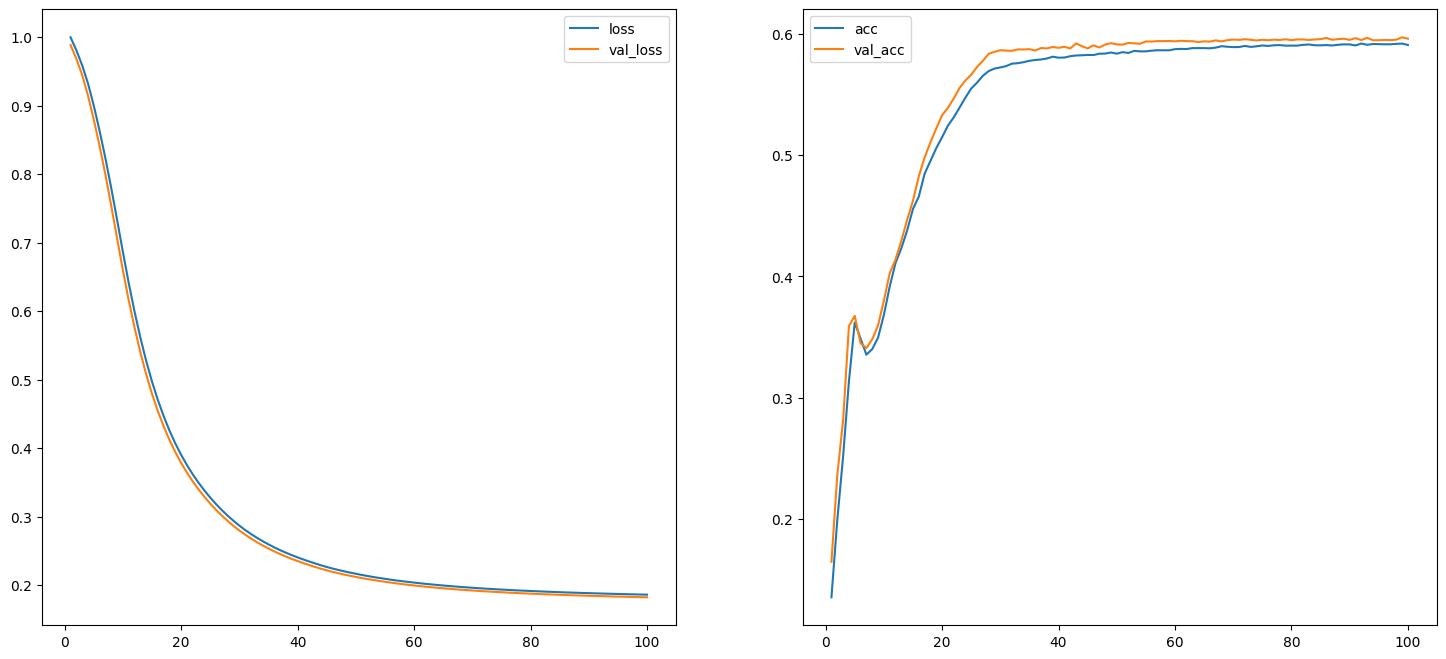

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].plot(epochs, val_loss, label="val_loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="acc")
ax[1].plot(epochs, val_acc, label="val_acc")
ax[1].legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Text(0.5, 1.0, 'should be')

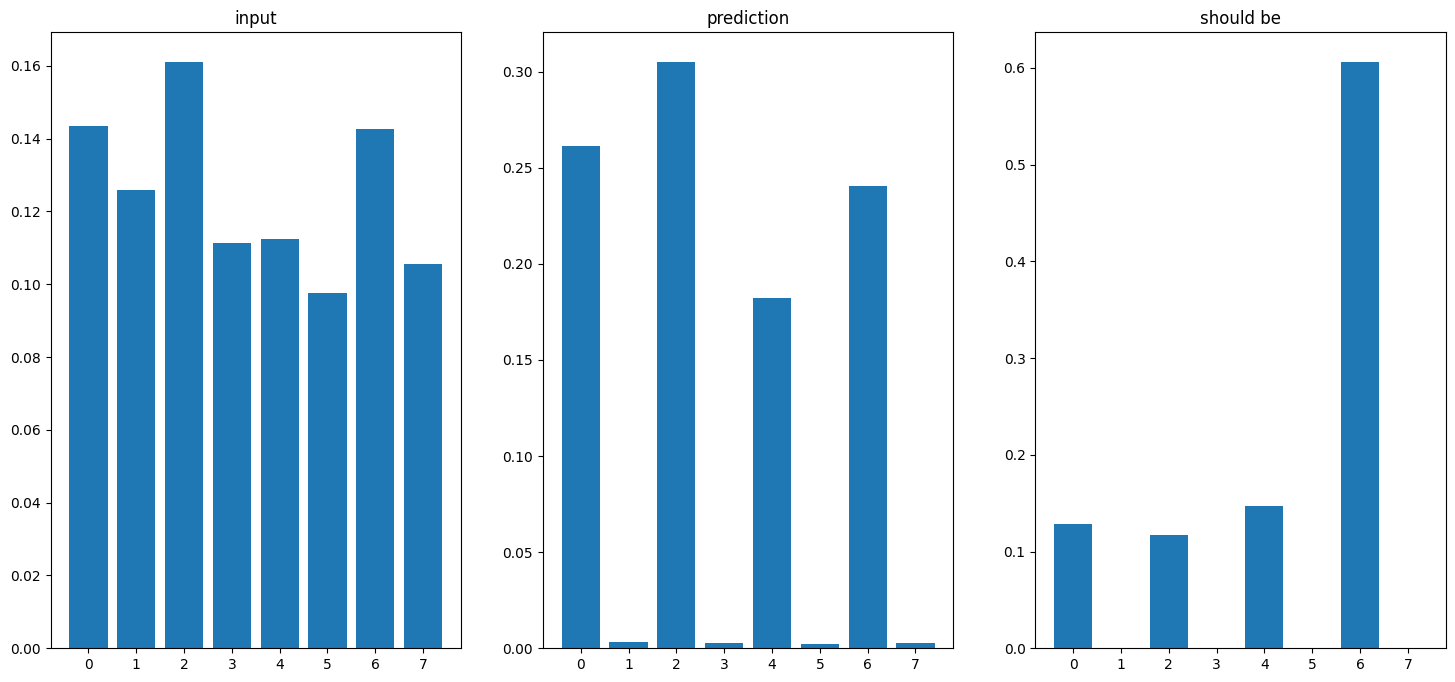

In [ ]:
i = 17

pred = test_model.predict(np.array([X[i]]))[0]

xs = np.arange(len(X[i]))

fig, ax = plt.subplots(ncols=3, figsize=(18,8))
ax[0].bar(xs, X[i])
ax[0].set_title("input")
ax[1].bar(xs, pred)
ax[1].set_title("prediction")
ax[2].bar(xs, y[i])
ax[2].set_title("should be")

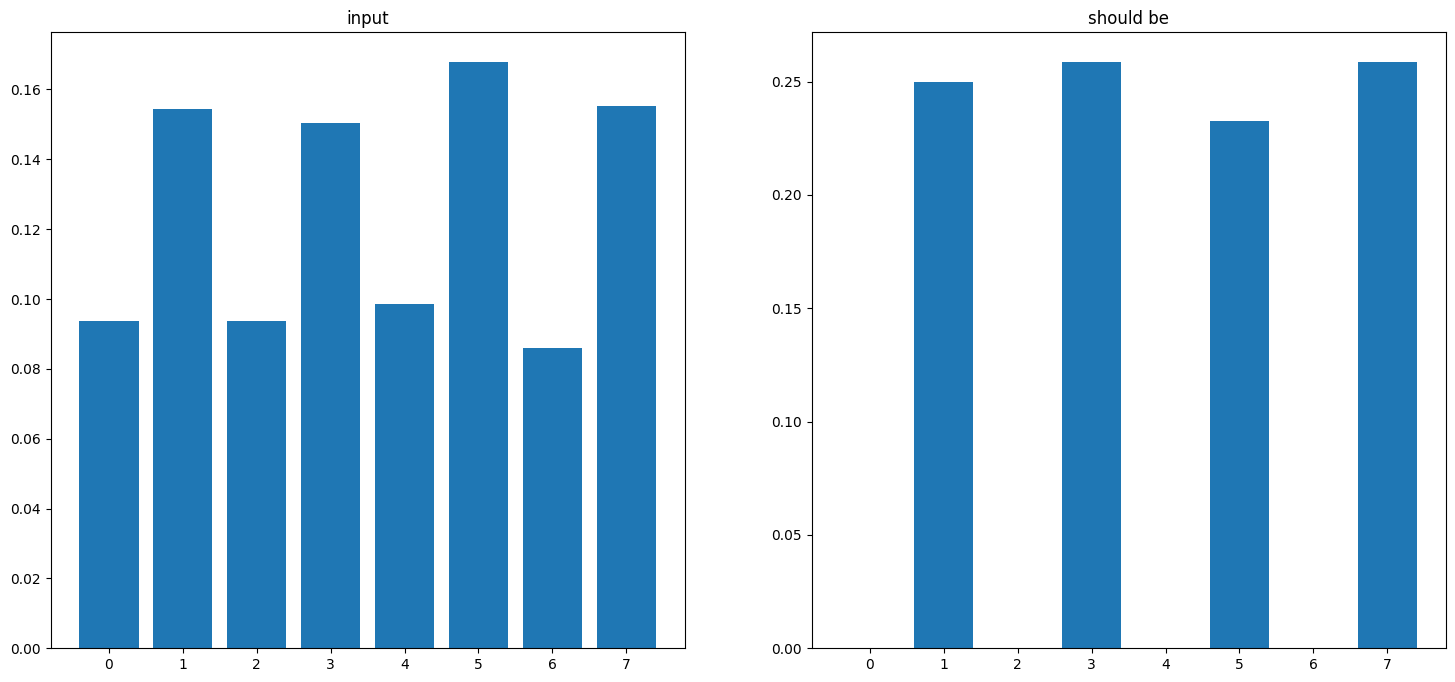

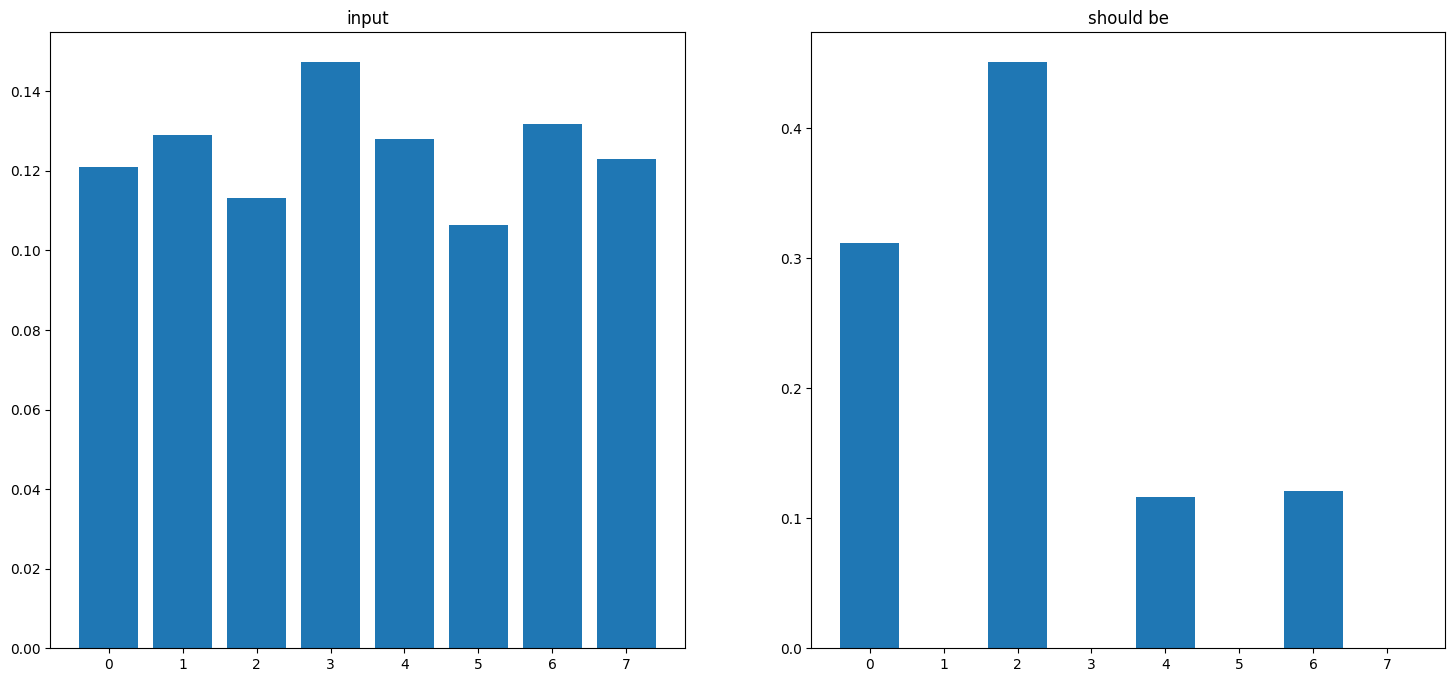

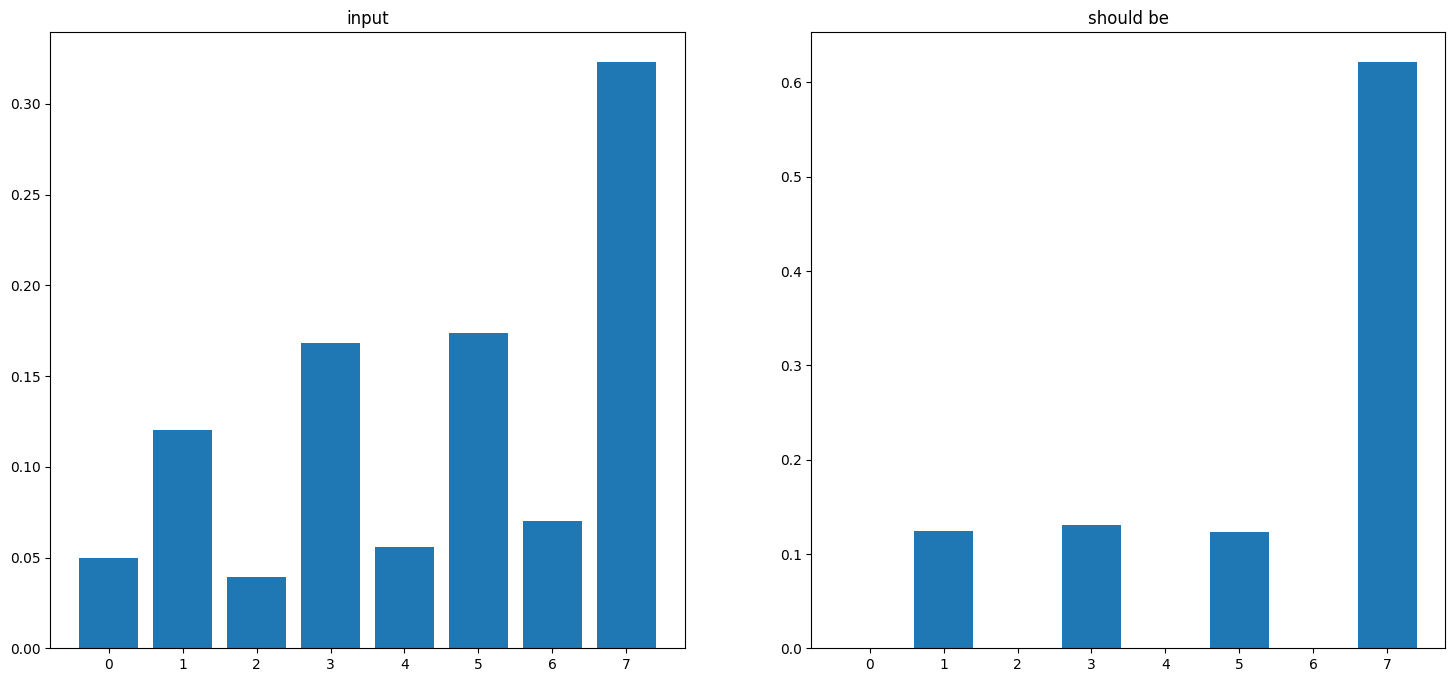

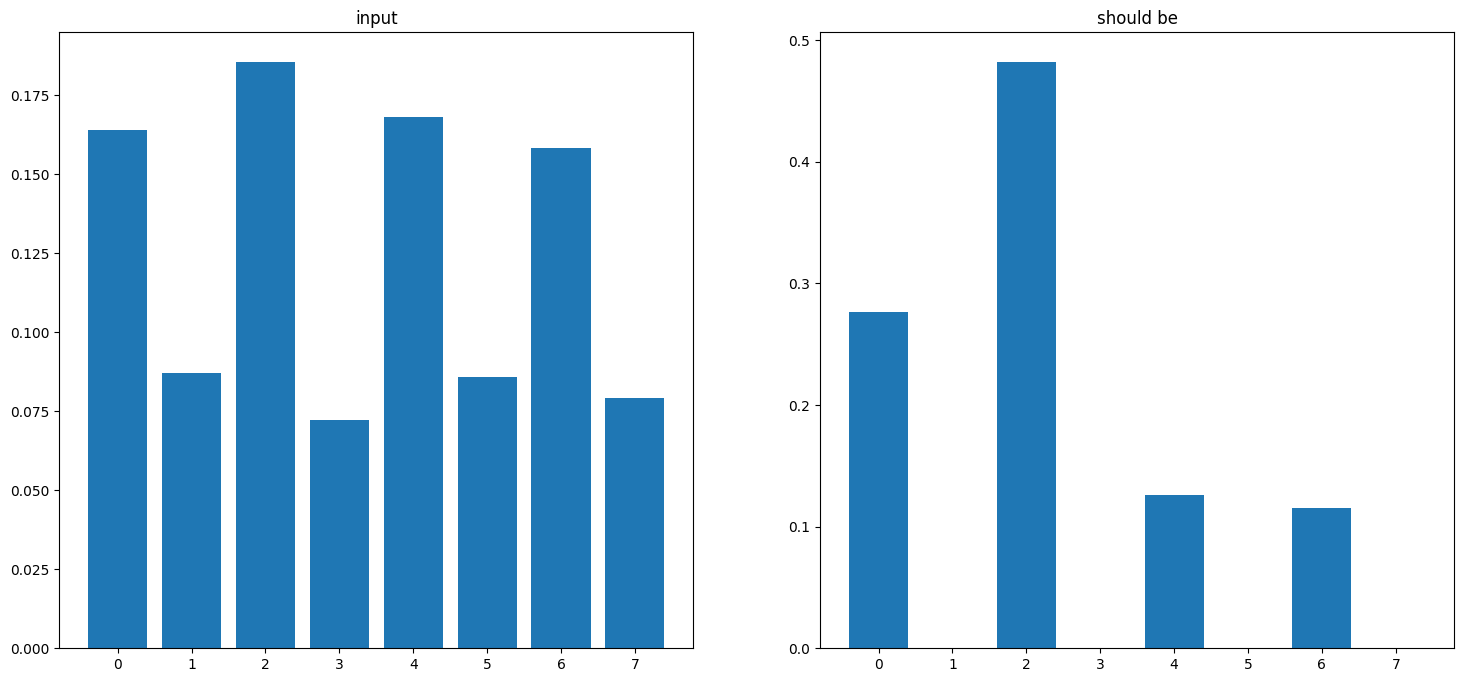

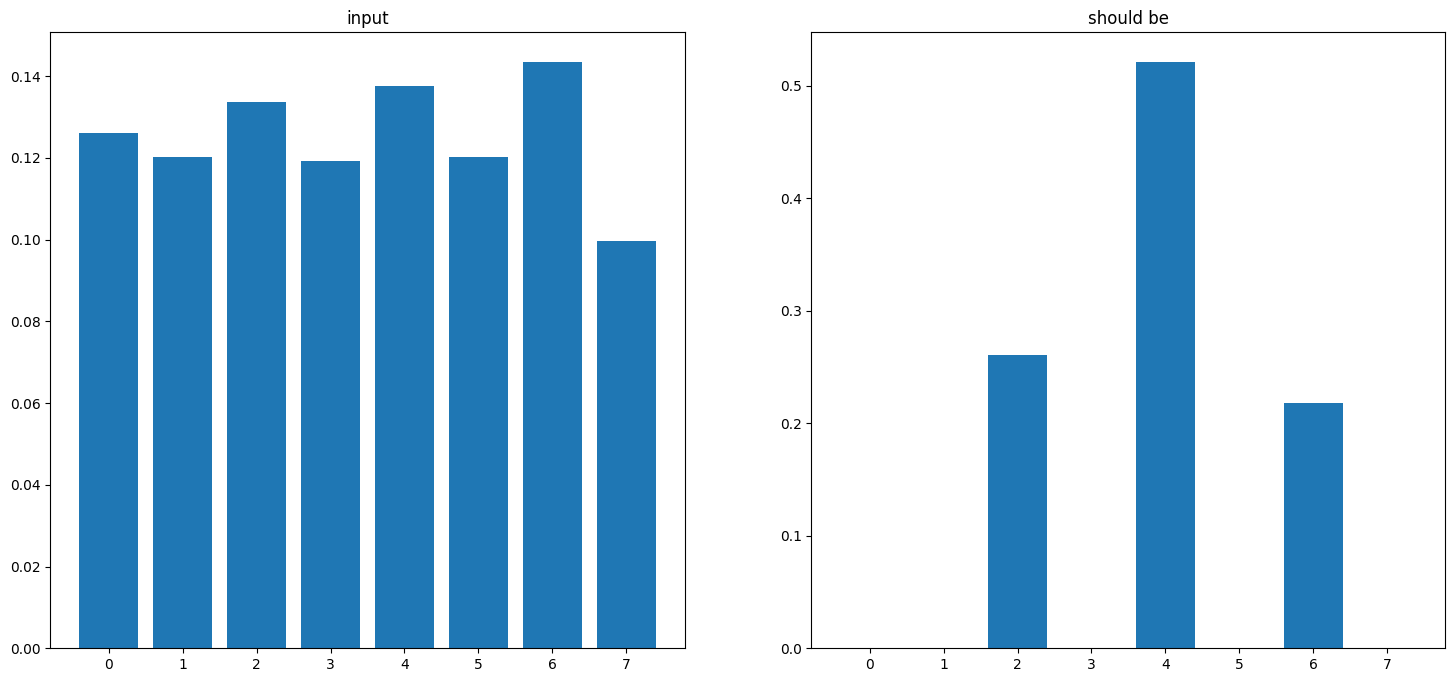

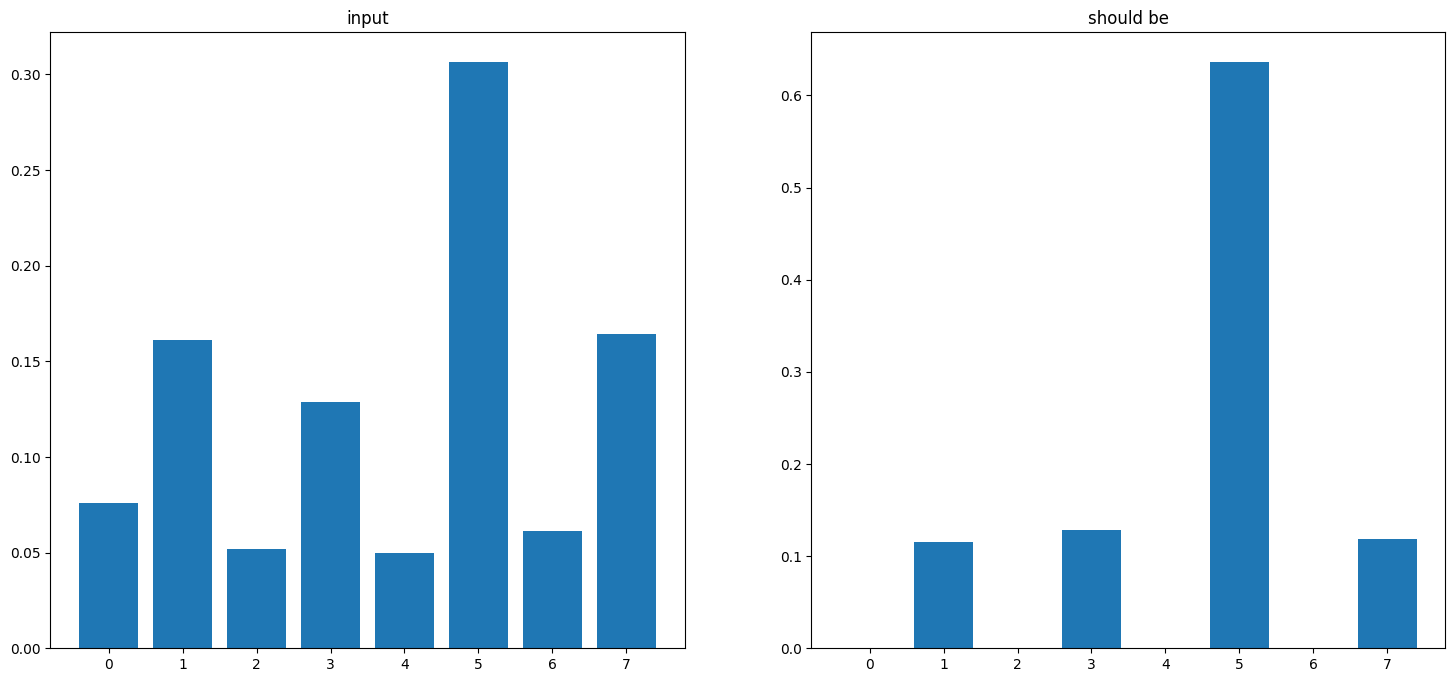

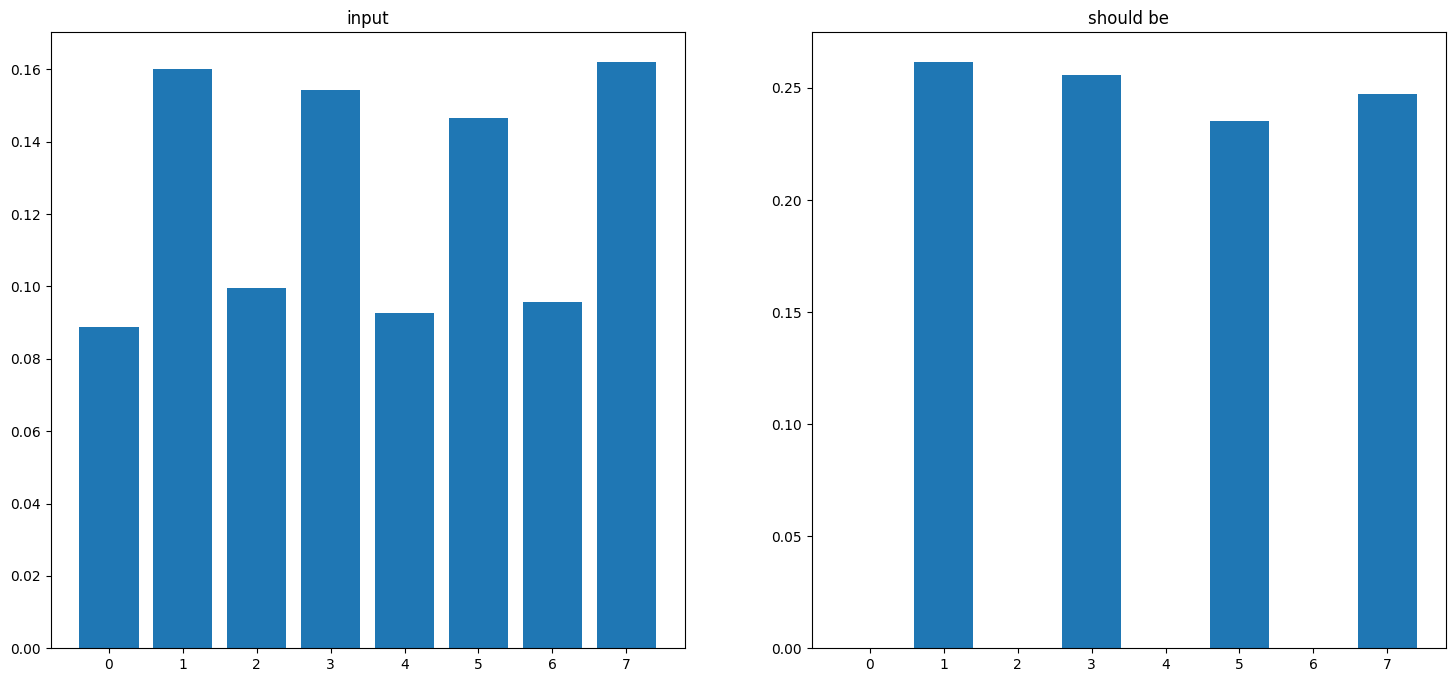

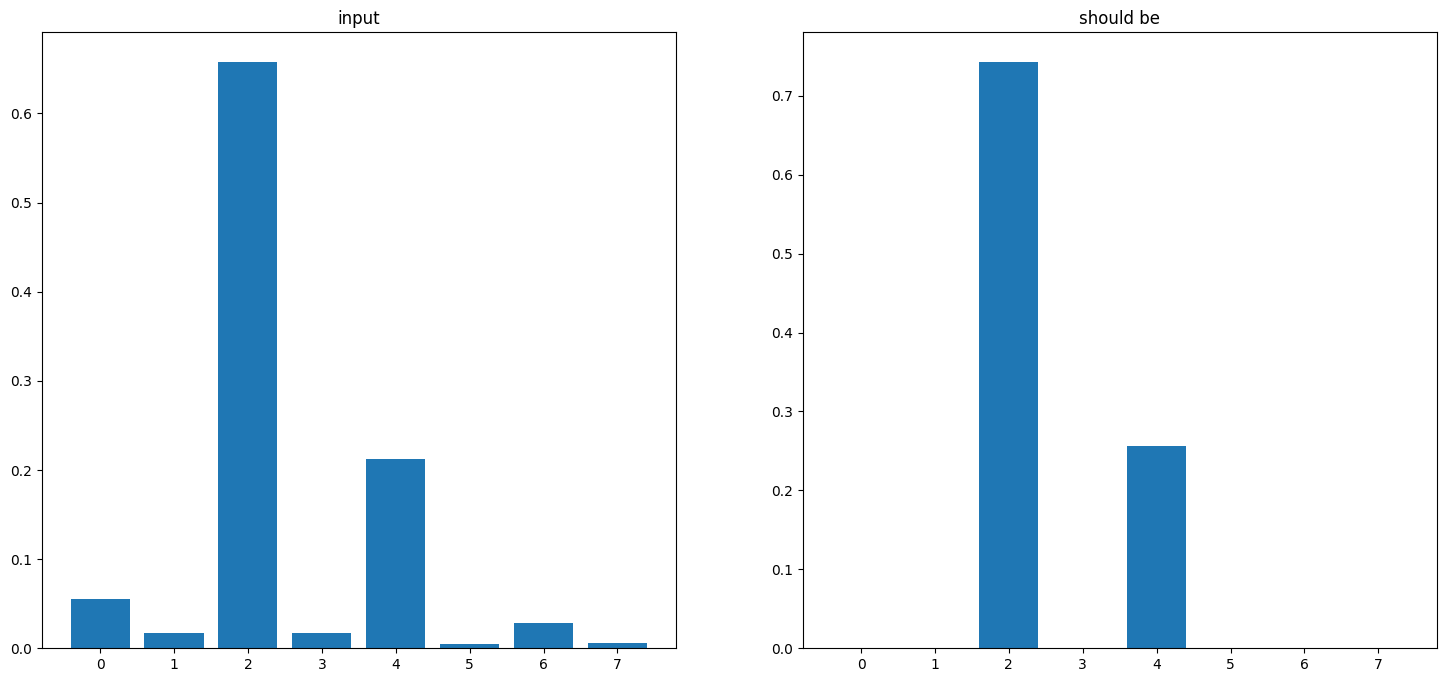

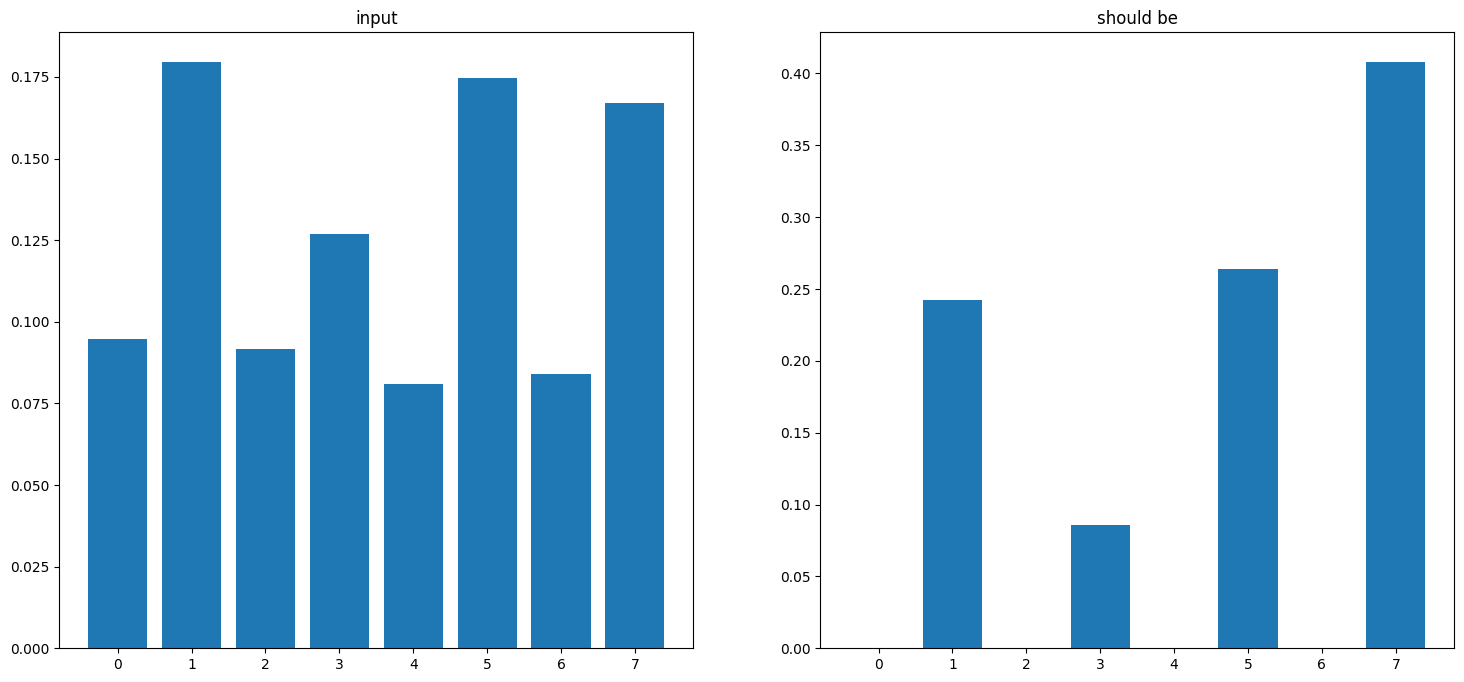

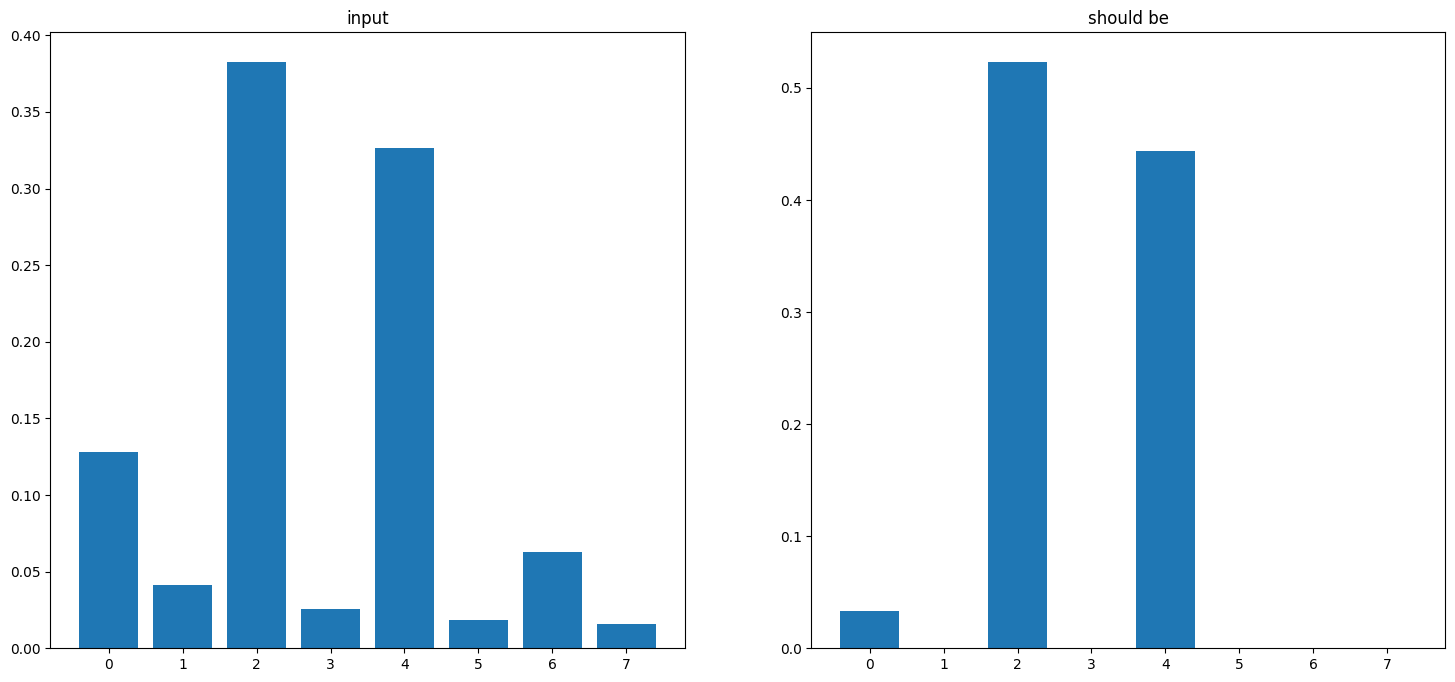

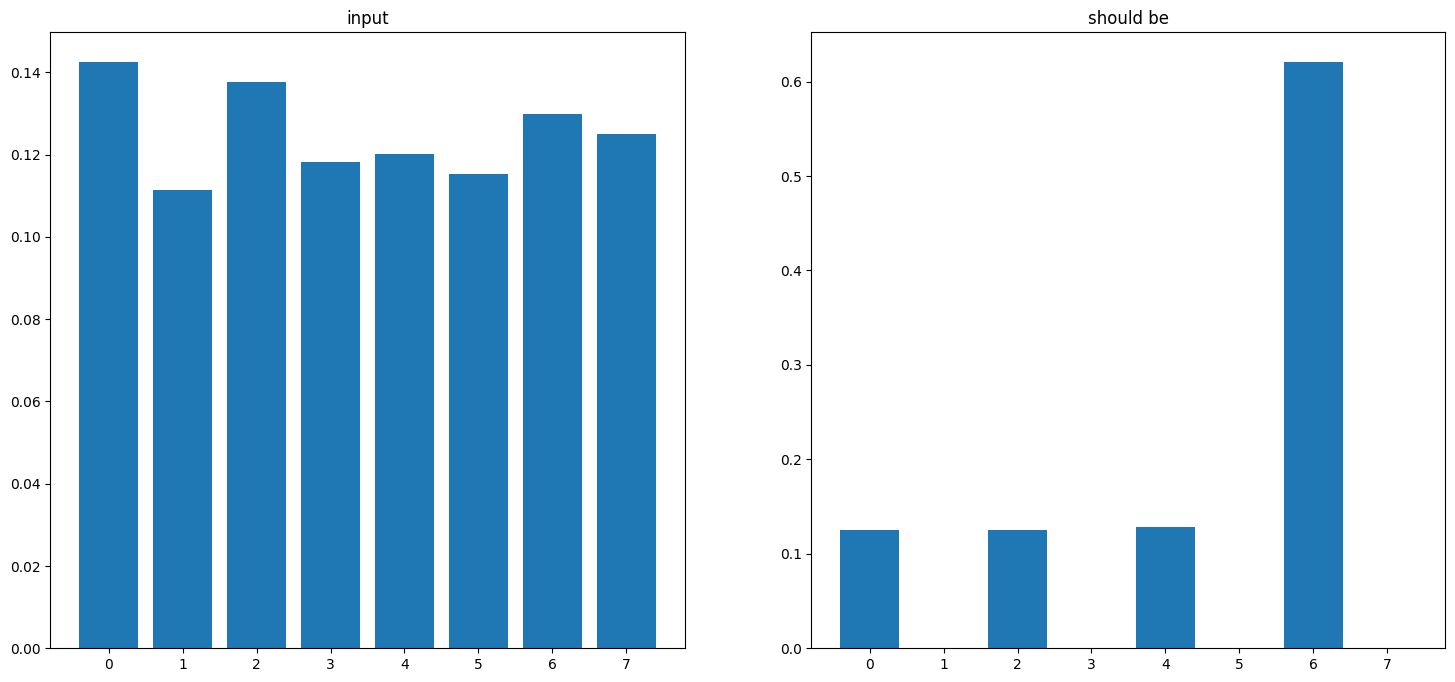

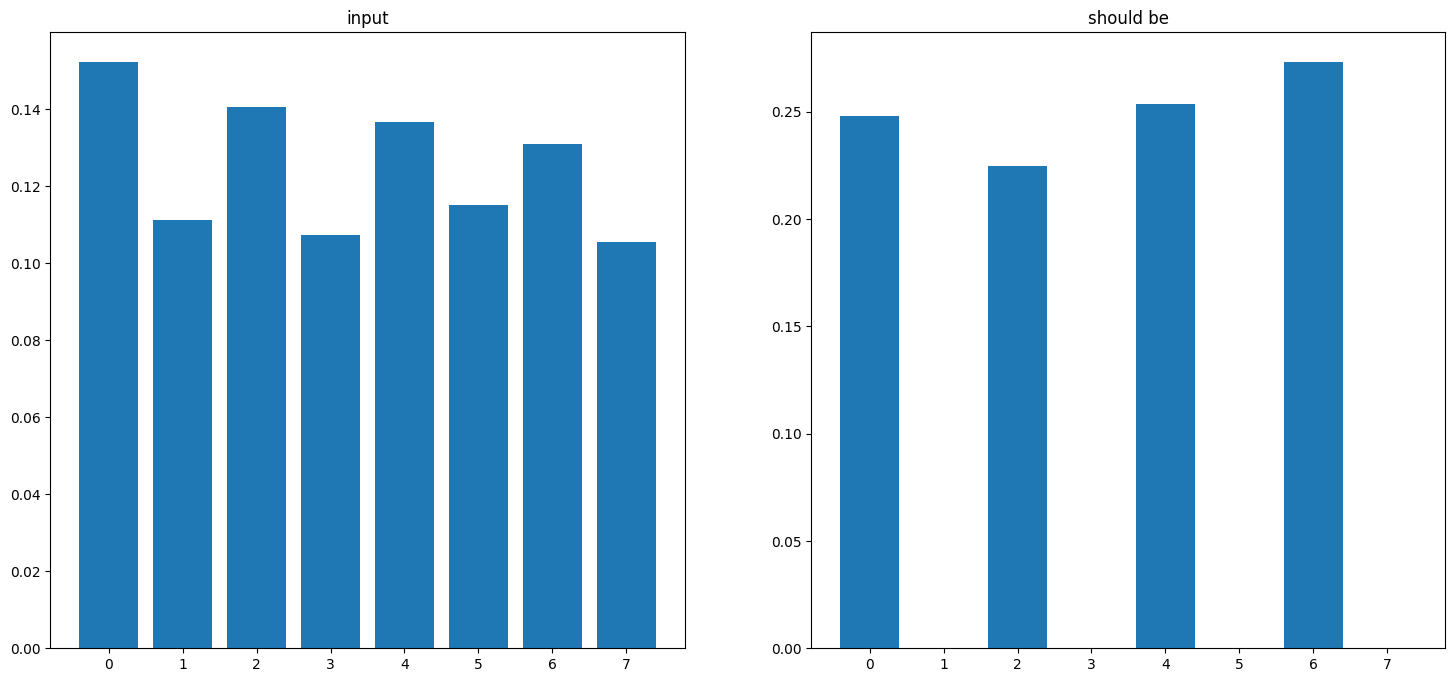

In [ ]:
for i in range(12):
    xs = np.arange(len(X[i]))

    fig, ax = plt.subplots(ncols=2, figsize=(18,8))
    ax[0].bar(xs, X[i])
    ax[0].set_title("input")
    ax[1].bar(xs, y[i])
    ax[1].set_title("should be")
    plt.show()